---
<h1 align="center">Title: WorldWide Internet Prices </h1>
<h3 align="center">Authors: Meir Nizri; Ron alfi; Dean dahan (Group: 18)</h3>
<h5 align="center">Date: September 2022</h5>

**Datasets links (click to move dataset page):**  
[Internet prices data](https://www.kaggle.com/datasets/ramjasmaurya/1-gb-internet-price)   
[GDP per capita data](https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths) 
  

---
**Table of Contents**
1. [Preprocess data](#section1)  
   1.1 [Features description](#section1.1)   
   1.2 [Missing values](#section1.2)  
   1.3 [Convert types](#section1.3)  
   1.4 [Add GDP per capita](#section1.4)    
   1.6 [understand data](#section1.5)  
   1.6 [Data distribution](#section1.6)   
2. [Internet prices and utilization around the world](#section2)  
3. [Correlations between the features](#section3)  
   3.1 [Internet speed, utilization and GDP per capita](#section3.1)  
   3.2 [Internet users, number of services and price](#section3.2) 
4. [Internet price difference between 2020-21](#section4)  
5. [What influence GDP growth?](#section5)  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read and show data

In [2]:
data_url = 'https://raw.githubusercontent.com/RonAlfi/worldwide-internet-1GB-speed-2021-2022/main/Internet%20Prices%20Data.csv'
internet_df = pd.read_csv(data_url)
internet_df.head(3)

,S.NO,Country code,Country,Continental region,NO. OF Internet Plans,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Average price of 1GB (USD at the start of 2021),Average price of 1GB (USD – at start of 2020),Internet users,Population,Avg \n(Mbit/s)Ookla
0,0,IL,Israel,NEAR EAST,27.0,0.05,0.02,20.95,0.11,0.9,"6,788,737","8,381,516",28.01
1,1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,0.15,0.10,7.08,0.21,0.27,"2,309,235","6,304,030",16.30
2,2,FJ,Fiji,OCEANIA,18.0,0.19,0.05,0.85,0.59,3.57,"452,479","883,483",25.99


---
<a id='section1'></a>
### 1. Preprocess data</br>

<a id='section1.1'></a>
#### 1.1 Features description
Rename features to simpler names:

In [3]:
internet_df.set_index('S.NO', inplace=True)
internet_df.rename(
    columns={
        "Continental region": "Region",
        "NO. OF Internet Plans": "Internet Plans",
        "Average price of 1GB (USD)": "Average Price",
        "Cheapest 1GB for 30 days (USD)": "Lowest Price", 
        "Most expensive 1GB (USD)" : "Highest Price", 
        "Average price of 1GB (USD  at the start of 2021)": "Avg price 2021", 
        "Average price of 1GB (USD – at start of 2020)": "Avg price 2020",
        "Internet users": "Internet Users",
        "Avg \n(Mbit/s)Ookla": "Avg speed"
    }, inplace=True)

<ul>
    <li>Country - The country name.</li>
    <li>Country code - unique shortcut of the country name.</li>
    <li>Region - of the world to which the country belongs.</li>
    <li>Internet Plans - number of internet services offered for purchase in the country.</li>
    <li>Averge Price - for 1GB in US dollars.</li>
    <li>Lowest Price - for 1GB in US dollars.</li>
    <li>Highest Price - for 1GB in US dollars.</li>
    <li>Avg price 2021 - average price for 1GB in the start of 2021 in US dollars.</li>
    <li>Avg price 2020 - average price for 1GB in the start of 2020 in US dollars.</li>
    <li>Internet Users - number of internet Users in the country.</li>
    <li>Population - number of people residing in the country.</li>
    <li>Avg speed - internet speed. Number of MB per second as tested by Ookla.</li>
</ul>

---
<a id='section1.2'></a>
#### 1.2 Missing values

In [4]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 243
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country code    242 non-null    object 
 1   Country         242 non-null    object 
 2   Region          242 non-null    object 
 3   Internet Plans  231 non-null    float64
 4   Average Price   242 non-null    object 
 5   Lowest Price    231 non-null    float64
 6   Highest Price   231 non-null    float64
 7   Avg price 2021  231 non-null    object 
 8   Avg price 2020  231 non-null    object 
 9   Internet Users  212 non-null    object 
 10  Population      210 non-null    object 
 11  Avg speed       141 non-null    float64
dtypes: float64(4), object(8)
memory usage: 24.6+ KB


Drop all countries with no internet services or duplicates.

In [5]:
internet_df.dropna(subset='Internet Plans', inplace=True)
internet_df.drop_duplicates(subset=['Country code'], inplace=True)

In [6]:
internet_df.reset_index(drop=True, inplace=True)
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country code    229 non-null    object 
 1   Country         229 non-null    object 
 2   Region          229 non-null    object 
 3   Internet Plans  229 non-null    float64
 4   Average Price   229 non-null    object 
 5   Lowest Price    229 non-null    float64
 6   Highest Price   229 non-null    float64
 7   Avg price 2021  229 non-null    object 
 8   Avg price 2020  229 non-null    object 
 9   Internet Users  203 non-null    object 
 10  Population      201 non-null    object 
 11  Avg speed       136 non-null    float64
dtypes: float64(4), object(8)
memory usage: 21.6+ KB


---
<a id='section1.3'></a>
#### 1.3 Convert types

In [7]:
internet_df = internet_df.convert_dtypes()
internet_df.dtypes

Country code       string
Country            string
Region             string
Internet Plans      Int64
Average Price      string
Lowest Price      Float64
Highest Price     Float64
Avg price 2021     string
Avg price 2020     string
Internet Users     string
Population         string
Avg speed         Float64
dtype: object

Some of the features converted to string and not numeric.  
Lets search what string they contain.

In [8]:
internet_df[
    (internet_df['Average Price'].str.contains('^[0-9]', regex=True) == False) | 
    (internet_df['Avg price 2020'].str.contains('^[0-9]', regex=True) == False) |
    (internet_df['Avg price 2021'].str.contains('^[0-9]', regex=True) == False)
]

,Country code,Country,Region,Internet Plans,Average Price,Lowest Price,Highest Price,Avg price 2021,Avg price 2020,Internet Users,Population,Avg speed
159,CK,Cook Islands,OCEANIA,9,3.5,1.49,11.42,NO PACKAGES,5.56,<NA>,<NA>,<NA>
193,VU,Vanuatu,OCEANIA,23,6.06,0.75,28.23,4.25,NO PACKAGES,"71,050","292,680",<NA>
194,TV,Tuvalu,OCEANIA,9,6.35,5.72,10.17,NO PACKAGES,12.42,"5,520","11,508",<NA>
202,CU,Cuba,CARIBBEAN,9,7.5,3.2,12.5,13.33,NO PACKAGES,"5,638,956","11,338,134",9.1
218,CC,Cocos (Keeling) Islands,OCEANIA,2,13.47,7.62,19.32,16.98,NO PACKAGES,<NA>,<NA>,<NA>


In [9]:
internet_df['Avg price 2020'].replace("NO PACKAGES", '0', inplace=True)
internet_df['Avg price 2021'].replace("NO PACKAGES", '0', inplace=True)

Remove the comma from the last two features so we can convert them to numbers.

In [10]:
internet_df['Internet Users'] = internet_df['Internet Users'].str.replace(',', '')
internet_df['Population'] = internet_df['Population'].str.replace(',', '')

Cast correct data types on features

In [11]:
internet_df.iloc[:, 3:] = internet_df.iloc[:, 3:].astype('float')
internet_df.dtypes

Country code       string
Country            string
Region             string
Internet Plans    float64
Average Price     float64
Lowest Price      float64
Highest Price     float64
Avg price 2021    float64
Avg price 2020    float64
Internet Users    float64
Population        float64
Avg speed         float64
dtype: object

---
<a id='section1.4'></a>
#### 1.4 Add GDP per capita

Read GDP per capita and GDP growth of every country data.

In [12]:
gdp_capita_url = "https://raw.githubusercontent.com/RonAlfi/worldwide-internet-1GB-speed-2021-2022/main/gdp%20per%20capita.csv"
gdp_capita = pd.read_csv(gdp_capita_url, encoding='latin-1')[['Country Name', '2020']].set_index('Country Name')
gdp_capita.rename(columns={"2020": "GDP capita"}, inplace=True)

gdp_growth_url = "https://raw.githubusercontent.com/RonAlfi/worldwide-internet-1GB-speed-2021-2022/main/gdp%20per%20capita%20growth.csv"
gdp_growth = pd.read_csv(gdp_growth_url, encoding='latin-1')[['Country Name', '2020']].set_index('Country Name')
gdp_growth.rename(columns={"2020": "GDP growth"}, inplace=True)

Join GDP data to our dataset.

In [13]:
internet_df = internet_df.join(gdp_capita, on='Country').join(gdp_growth, on='Country')
internet_df[['Country', 'GDP capita', 'GDP growth']].head(3)

,Country,GDP capita,GDP growth
0,Israel,44168.943640,-3.882774
1,Kyrgyzstan,1173.611304,-10.493685
2,Fiji,5057.631913,-16.321933


---
<a id='section1.5'></a>
#### 1.5 Understand data

Add internet utilization to the dataset.

In [14]:
internet_df['Internet Utilization'] = internet_df['Internet Users'] / internet_df['Population']

Add internet price difference between 2021 and 2020.

In [15]:
internet_df['Price Diff'] = internet_df['Avg price 2021'] - internet_df['Avg price 2020']
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country code          229 non-null    string 
 1   Country               229 non-null    object 
 2   Region                229 non-null    string 
 3   Internet Plans        229 non-null    float64
 4   Average Price         229 non-null    float64
 5   Lowest Price          229 non-null    float64
 6   Highest Price         229 non-null    float64
 7   Avg price 2021        229 non-null    float64
 8   Avg price 2020        229 non-null    float64
 9   Internet Users        203 non-null    float64
 10  Population            201 non-null    float64
 11  Avg speed             136 non-null    float64
 12  GDP capita            190 non-null    float64
 13  GDP growth            192 non-null    float64
 14  Internet Utilization  201 non-null    float64
 15  Price Diff            2

---
<a id='section1.6'></a>
#### 1.6 Data distribution

Plot histogram and boxplot to every feature.

In [16]:
features = ['Internet Plans', 'Average Price', 'Lowest Price', 'Highest Price', 
            'Avg price 2020', 'Avg price 2021', 'Price Diff', 'Internet Users', 
            'Population', 'Internet Utilization', 'GDP capita', 'GDP growth']
melted_internet_df = pd.melt(internet_df[features], value_vars = features)

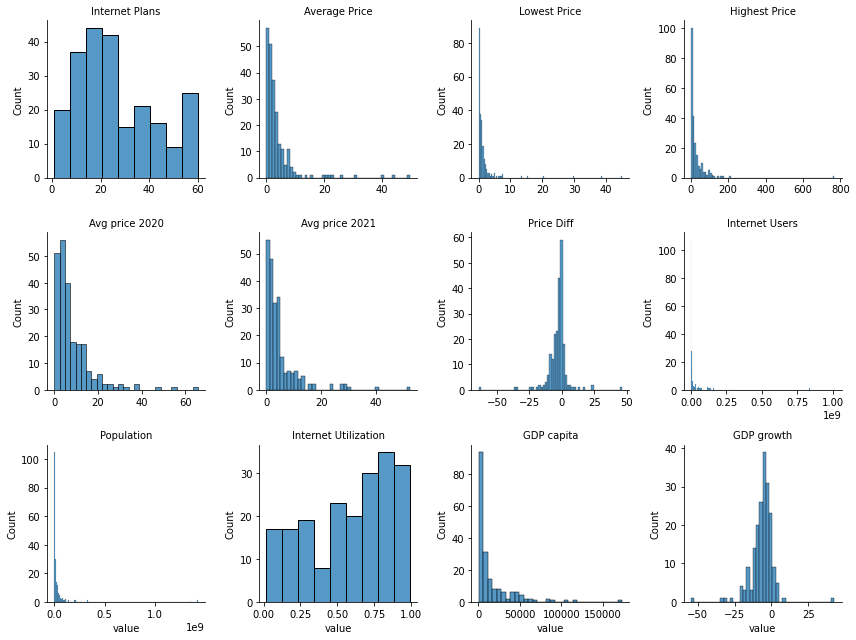

In [17]:
g_hist = sns.FacetGrid(data = melted_internet_df, col="variable", col_wrap=4, sharex=False, sharey=False)
g_hist.map_dataframe(sns.histplot, x='value')
g_hist.set_titles(col_template="{col_name}")
plt.show()

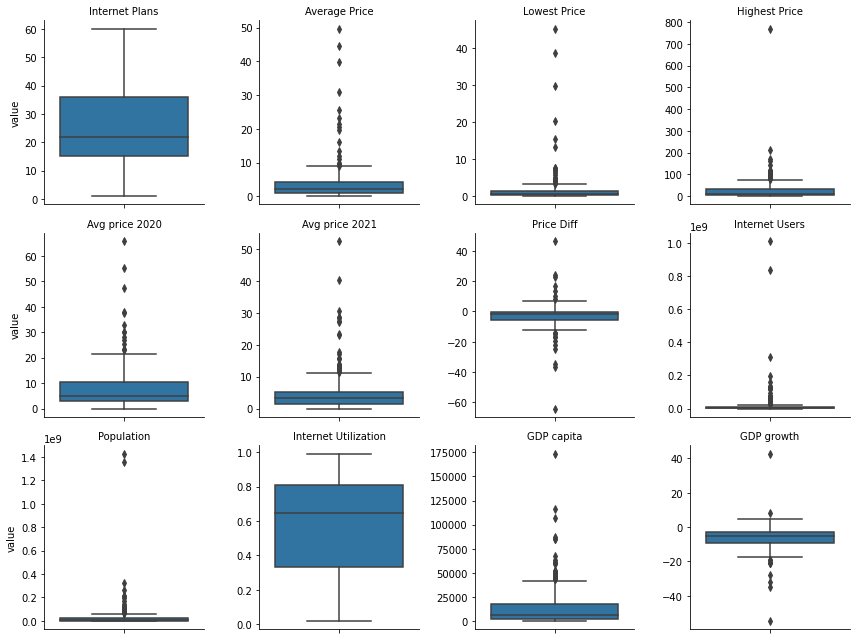

In [18]:
g_box = sns.FacetGrid(data = melted_internet_df, col="variable", col_wrap=4, sharex=False, sharey=False)
g_box.map_dataframe(sns.boxplot, y='value')
g_box.set_titles(col_template="{col_name}")
plt.show()

<b>Note:</b> most features are Birnbaum–Saunders (fatigue life) distributed around 0, and contain quite a few outliers. Hence, we use Spearman correlation test to check relation between features.

---
<a id='section2'></a>
### 2. Internet prices and usage precentage around the world

Examine Which region of the world pays the most for internet and which region pays the least.

In [19]:
price_features = ['Region', 'Lowest Price', 'Highest Price', 'Average Price']
melted_internet_df = pd.melt(internet_df[price_features], id_vars='Region', value_vars=price_features)
# sort region by Lowest price
avg_sorted = internet_df.groupby('Region')[['Lowest Price']].median().sort_values('Lowest Price')

[(0.0, 15.0), Text(0.5, 6.79999999999999, '1GB Average price')]

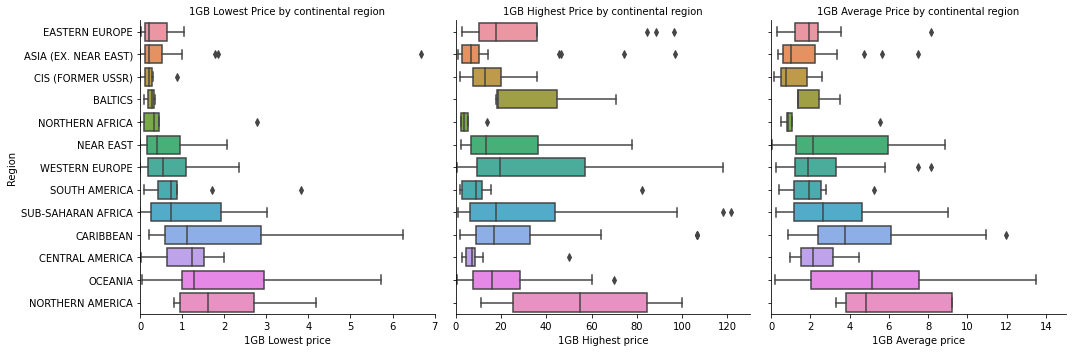

In [20]:
g_prices = sns.catplot(
    data=melted_internet_df, x='value', y='Region', col='variable', 
    kind='box', col_wrap=3, order=avg_sorted.index, sharex=False
)
g_prices.set_titles(col_template="1GB {col_name} by continental region")
g_prices.axes[0].set(xlim=(0, 7), xlabel='1GB Lowest price')
g_prices.axes[1].set(xlim=(0, 130), xlabel='1GB Highest price')
g_prices.axes[2].set(xlim=(0, 15), xlabel='1GB Average price')

<b>Observation 1</b>:  
Regions that pay the most: Northern America, Oceania and Caribbean.  
Regions that pay the least: Northern Africa and East Europe (inculde Batics and CIS).

---
Now we will examine which regions in the world have the highest and lowest percentage of internet users:

In [21]:
features_util = ['Region', 'Internet Utilization', 'GDP capita']
melted_internet_df = pd.melt(internet_df[features_util], id_vars='Region', value_vars=features_util)
# sort region by Lowest price
util_sorted = internet_df.groupby('Region')[['Internet Utilization']].mean().sort_values('Internet Utilization')

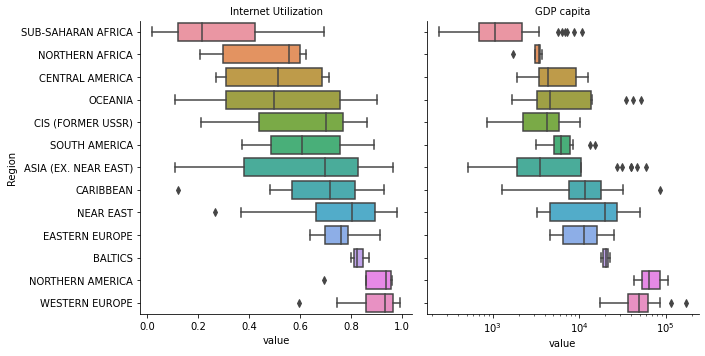

In [22]:
g_util = sns.catplot(
    data=melted_internet_df, x='value', y='Region', col='variable', 
    kind='box', col_wrap=2, order=util_sorted.index, sharex=False
)
g_util.set_titles(col_template="{col_name}")
g_util.axes[1].set_xscale("log")

<b>Observation 2</b>: Unsurprisingly, Western Europe and North America have the highest percentage of internet usage. The lowest percentage of use is in Africa. These results correspond to the average GDP per capita of this regions.  
Later we will expand on the relationship between Internet use and GDP.

---
<a id='section3'></a>
### 3. Correlations between the features

Let's check correlations between all the different features in the data to find relationships between them.

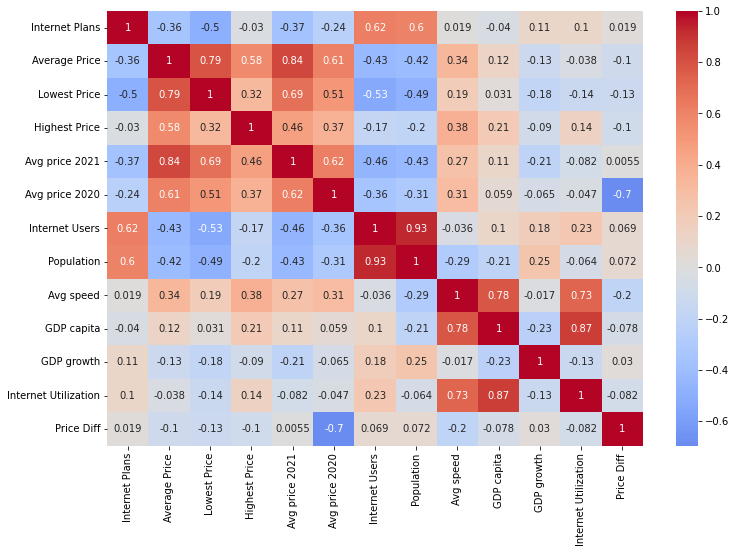

In [23]:
corrs = internet_df.corr(method = 'spearman')

plt.figure(figsize=(12,8))
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

There are indeed some correlations. Let's zoom in on the most interesting ones. But first, create a function that returns the Spearman correlation between two features.

In [24]:
def spearman_cor(f1, f2):
    corr = round(internet_df[f1].corr(internet_df[f2], 'spearman'), 3)
    return f"Spearman: {corr}"

---
<a id='section3.1'></a>
#### 3.1 Internet speed, utilization and GDP per capita

In the heatmap above we can see that there is correlations between internet speed, internet usage percentage and GDP per capita. Let's look at each relationship separately. We will subtract outliers to get a clearer figure.

In [25]:
internet_df_outliers = internet_df.loc[internet_df['GDP capita']<55000]

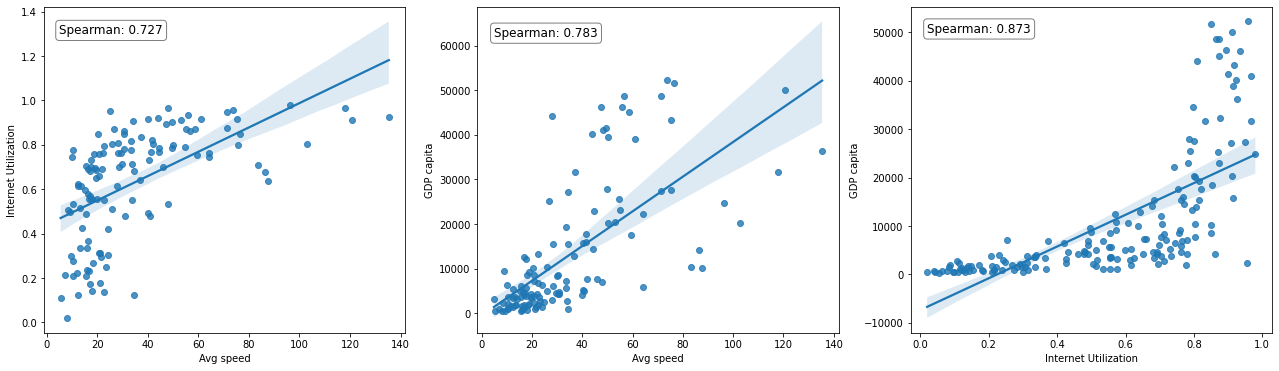

In [26]:
fig, axes = plt.subplots(figsize=(22, 6), ncols=3)
sns.regplot(ax=axes[0], x='Avg speed', y='Internet Utilization', data=internet_df_outliers);
sns.regplot(ax=axes[1], x='Avg speed', y='GDP capita', data=internet_df_outliers);
sns.regplot(ax=axes[2], x='Internet Utilization', y='GDP capita', data=internet_df_outliers);

# add pearson correlation to the figures
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
axes[0].text(5, 1.30, spearman_cor('Avg speed', 'Internet Utilization'), fontsize=12, bbox=props)
axes[1].text(5, 62000, spearman_cor('Avg speed', 'GDP capita'), fontsize=12, bbox=props)
axes[2].text(0.02, 50000, spearman_cor('Internet Utilization', 'GDP capita'), fontsize=12, bbox=props)
plt.show()

<b>Observation 3</b>: There is a strong positive correleation between a high internet speed, high percentage of internet users, and high GDP per capita. That is, if one of them is at a high level then the other two will also be at a high level. This datum is very consistent with our understanding of progressive countries.

---
<a id='section3.2'></a>
#### 3.2 Internet users, number of services and price

In the heatmap above we can see that there is correlations between number of internet user, number of internet services and internet price. Let's look at each relationship separately. We will subtract outliers to get a clearer figure.

In [27]:
internet_df_outliers = internet_df.loc[
    (internet_df['Internet Users'] < 7*10**7) & 
    (internet_df['Lowest Price'] < 5)
]

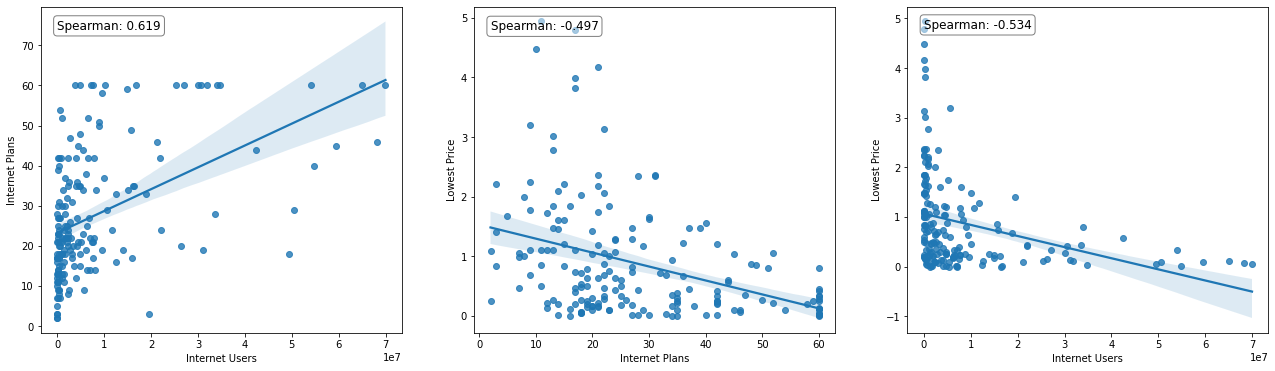

In [28]:
fig, axes = plt.subplots(figsize=(22, 6), ncols=3)
sns.regplot(ax=axes[0], x='Internet Users', y='Internet Plans', data=internet_df_outliers);
sns.regplot(ax=axes[1], x='Internet Plans', y='Lowest Price', data=internet_df_outliers);
sns.regplot(ax=axes[2], x='Internet Users', y='Lowest Price', data=internet_df_outliers);

# add pearson correlation to the figures
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
axes[0].text(0.2, 74, spearman_cor('Internet Users', 'Internet Plans'), fontsize=12, bbox=props)
axes[1].text(2, 4.8, spearman_cor('Internet Plans', 'Lowest Price'), fontsize=12, bbox=props)
axes[2].text(0.2, 4.8, spearman_cor('Internet Users', 'Lowest Price'), fontsize=12, bbox=props)
plt.show()

<b>Observation 4</b>: There is a weak correlation between a high number of Internet users, high number of Internet services and a low Internet price. This observation is consistent with our understanding of a competitive economy. The more services there are, the price should go down.

---
<a id='section4'></a>
### 4. Internet price difference between 2020-21?

Let's check in how many countries the price of the Internet has increased and in how many it has decreased.

Text(0.5, 1.0, 'The count of countries that raised/lowered prices')

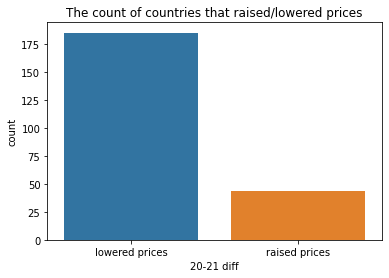

In [29]:
internet_df['20-21 diff'] = internet_df['Price Diff'].apply(lambda x: 'lowered prices' if (x<0) else 'raised prices')
sns.countplot(x="20-21 diff", data=internet_df)
plt.title('The count of countries that raised/lowered prices')

<b>Observation 4</b>: The number of countries that raised prices is much larger. This probably has something to do with the fact that in 2020 an epidemic broke out and the demand for the internet increased significantly.  

Let's check if there is a connection to the growth of GDP per capita in 2020. First, We will subtract outliers to get a clearer figure.

In [30]:
internet_df_outliers = internet_df.loc[
    (internet_df['Price Diff'] > -40) &
    (internet_df['GDP growth'] > -30) & 
    (internet_df['GDP growth'] < 20)
]

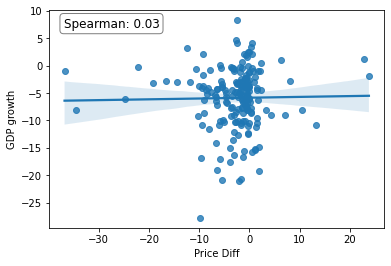

In [31]:
g = sns.regplot(x='Price Diff', y='GDP growth', data=internet_df_outliers);

# add pearson correlation to the figures
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
g.text(-37, 7, spearman_cor('Price Diff', 'GDP growth'), fontsize=12, bbox=props)
plt.show()

There is no connection between them.

In [32]:
# <!-- ---
# <a id='section5'></a>
# ### 5. What influence GDP growth? -->